In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import string
import pprint
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
titanic_test = pd.read_csv('./titanic_test.csv')
titanic_train = pd.read_csv('./titanic_train.csv')
titanic_train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

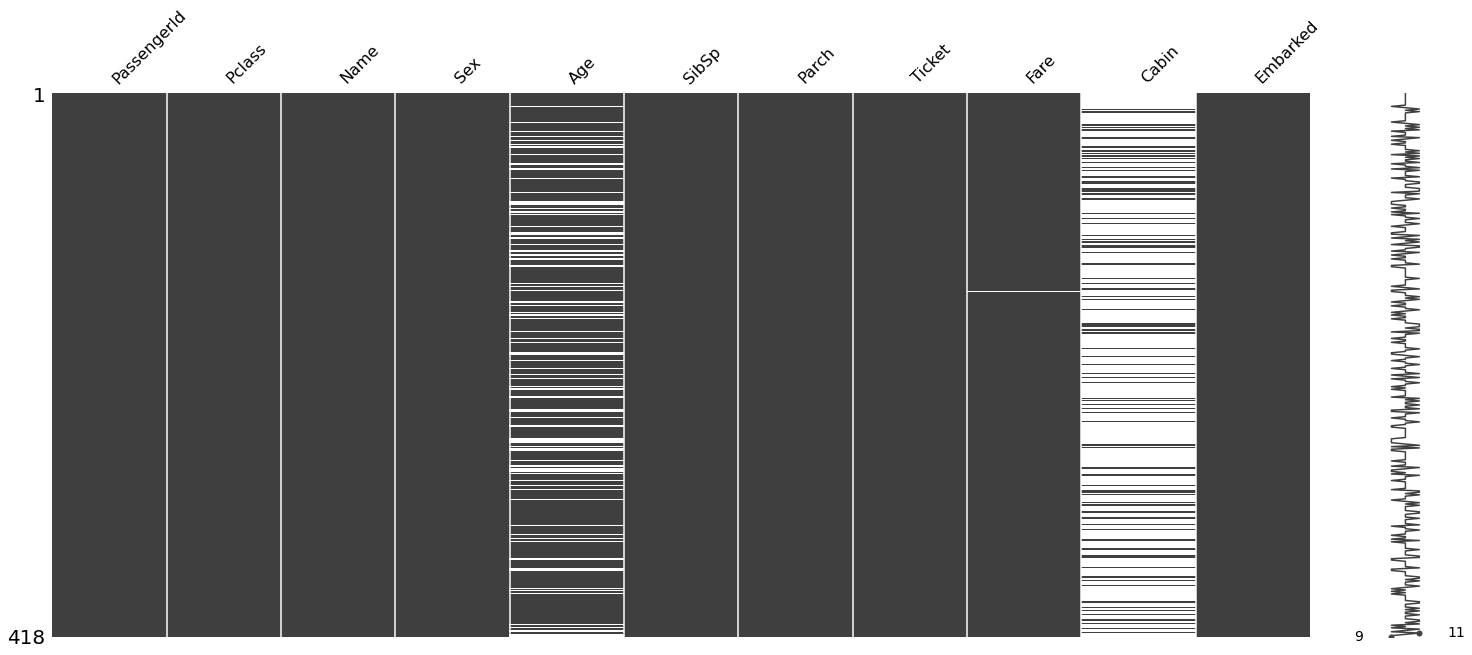

In [3]:
import missingno as msno

msno.matrix(titanic_test)

In [4]:
titanic_train=titanic_train.drop(["Cabin"],axis=1)
titanic_train=titanic_train.drop(["Ticket"],axis=1)
titanic_train=titanic_train.drop(["Name"],axis=1)

titanic_test=titanic_test.drop(["Cabin"],axis=1)
titanic_test=titanic_test.drop(["Ticket"],axis=1)
titanic_test=titanic_test.drop(["Name"],axis=1)

<AxesSubplot:>

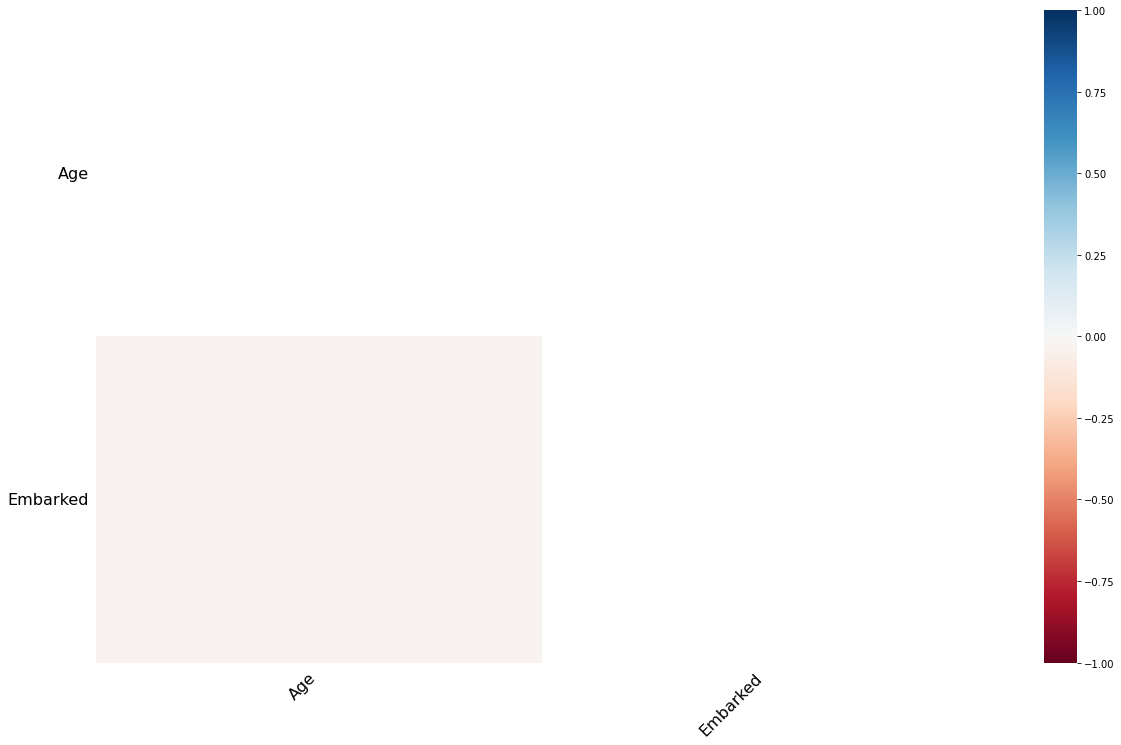

In [5]:
msno.heatmap(titanic_train)

In [6]:
titanic_train['Age']=titanic_train['Age'].fillna(titanic_train['Age'].mean())
titanic_train.info()

titanic_test['Age']=titanic_test['Age'].fillna(titanic_test['Age'].mean())
titanic_test.info()

titanic_test['Fare']=titanic_test['Fare'].fillna(titanic_test['Fare'].mean())
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp     

In [7]:
titanic_train.dropna()
titanic_test.dropna()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.50000,0,0,7.8292,Q
1,893,3,female,47.00000,1,0,7.0000,S
2,894,2,male,62.00000,0,0,9.6875,Q
3,895,3,male,27.00000,0,0,8.6625,S
4,896,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,8.0500,S
414,1306,1,female,39.00000,0,0,108.9000,C
415,1307,3,male,38.50000,0,0,7.2500,S
416,1308,3,male,30.27259,0,0,8.0500,S


In [8]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

titanic_train['Sex']=label_encoder.fit_transform(titanic_train['Sex'])
titanic_train['Embarked']=label_encoder.fit_transform(titanic_train['Embarked'])

titanic_test['Sex']=label_encoder.fit_transform(titanic_test['Sex'])
titanic_test['Embarked']=label_encoder.fit_transform(titanic_test['Embarked'])

In [9]:
titanic_train['Age']=titanic_train['Age'].astype(int)
titanic_train['Fare']=titanic_train['Fare'].astype(int)

titanic_test['Age']=titanic_test['Age'].astype(int)
titanic_test['Fare']=titanic_test['Fare'].astype(int)

In [ ]:
X = titanic_train.drop(['Survived'], axis=1)

y = titanic_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Decision Tree with depth 3

In [49]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

DecisionTreeClassifier(criterion='entropy', max_depth=3)


In [59]:
with open("survivor_classifier_1.txt", "w") as f:
    f = tree.export_graphviz(clf, out_file=f)

In [47]:
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {}'.format(precision_score(y_test, y_pred)))
print('Recall score: {}'.format(recall_score(y_test, y_pred)))
print('F1 score: {}'.format(f1_score(y_test, y_pred)))

Accuracy score: 0.8212290502793296
Precision score: 0.7846153846153846
Recall score: 0.7391304347826086
F1 score: 0.7611940298507462


<AxesSubplot:>

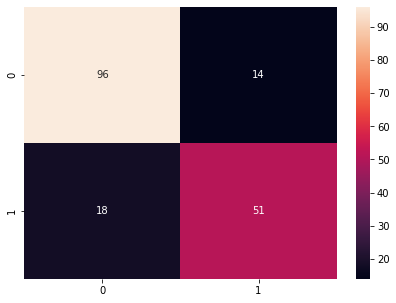

In [52]:
#confusion matrix
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(mat, annot=True)

# Decission tree with depth max depth 10 and min split 5

In [54]:
clf1= DecisionTreeClassifier( max_depth=1,min_samples_split=5)

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf1.predict(X_test)

In [58]:
with open("survivor_classifier_2.txt", "w") as f:
    f = tree.export_graphviz(clf1, out_file=f)

In [56]:
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {}'.format(precision_score(y_test, y_pred)))
print('Recall score: {}'.format(recall_score(y_test, y_pred)))
print('F1 score: {}'.format(f1_score(y_test, y_pred)))

Accuracy score: 0.7877094972067039
Precision score: 0.7313432835820896
Recall score: 0.7101449275362319
F1 score: 0.7205882352941175


<AxesSubplot:>

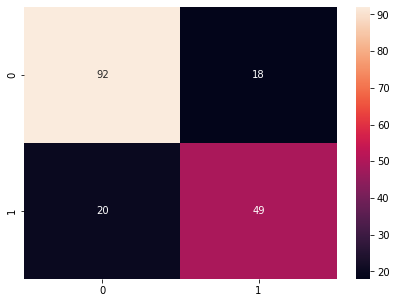

In [57]:
#confusion matrix
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(mat, annot=True)

# Random Forest Classifier model with parameters

In [30]:
from sklearn.ensemble import RandomForestClassifier
#rf_model = RandomForestClassifier(n_estimators=10,oob_score=True, criterion='entropy',max_depth=3)
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [31]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [32]:
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {}'.format(precision_score(y_test, y_pred)))
print('Recall score: {}'.format(recall_score(y_test, y_pred)))
print('F1 score: {}'.format(f1_score(y_test, y_pred)))

Accuracy score: 0.8100558659217877
Precision score: 0.7966101694915254
Recall score: 0.6811594202898551
F1 score: 0.7343750000000001


In [37]:
columns = list(X.columns.values)
print(clf.feature_importances_)
list(zip(columns,clf.feature_importances_))

[0.04041484 0.11809703 0.52457901 0.07345749 0.03376184 0.02682772
 0.15340095 0.02946112]


[('PassengerId', 0.04041483722023016),
 ('Pclass', 0.11809702790161712),
 ('Sex', 0.5245790110309135),
 ('Age', 0.07345748647789735),
 ('SibSp', 0.03376184476530603),
 ('Parch', 0.026827717972607003),
 ('Fare', 0.1534009546038399),
 ('Embarked', 0.02946112002758895)]

<AxesSubplot:>

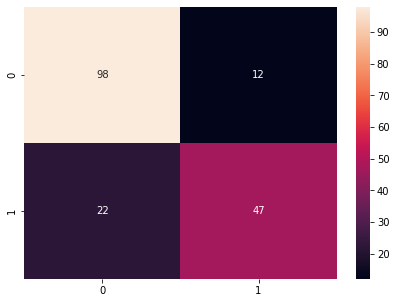

In [45]:
#confusion matrix
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(mat, annot=True)

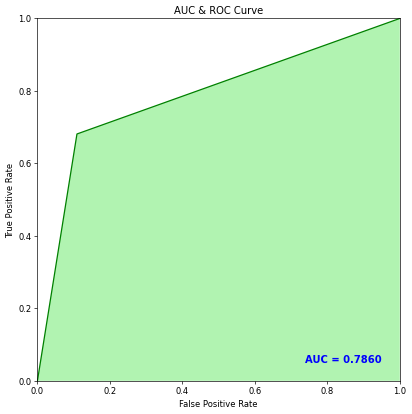

In [44]:
from sklearn.metrics import roc_curve,roc_auc_score
auc=roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10,8), dpi=60)
plt.axis('scaled')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("AUC & ROC Curve")
plt.plot(fpr,tpr,'g')
plt.fill_between(fpr,tpr,facecolor='lightgreen',alpha=0.7)
plt.text(0.95,0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()